<a href="https://colab.research.google.com/github/DebasisBaidya/Sales_Forecasting_Project-6/blob/main/Task%202-2.5%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; font-family: 'Verdana', sans-serif; font-size: 24px; margin-top: 50px; font-weight: bold; background-color: blue; color: white; padding: 20px;">
    Sales Forecasting Across Multiple Retail Stores Project </div>

In [ ]:
# Adding Task Name in HTML Format with Blue Background, White Font
from IPython.display import display, HTML

display(HTML("""
<div style="text-align: center; font-family: 'Verdana', sans-serif; font-size: 24px; margin-top: 50px; font-weight: bold; background-color: blue; color: white; padding: 20px;">
    Task 2: Prediction of Store Sales
</div>
"""))

In [ ]:
# Mounting Google Drive in Colab

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**Saving Logging Information to a File**

rossman.log file will be stored in the directory "/content/drive/MyDrive/Project 6"

In [ ]:
import logging

# Define folder and log file path
folder = "/content/drive/MyDrive/Project 6"
log_file_path = f"{folder}/rossman.log"

# Create a logger
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)  # Set the logger to DEBUG level

# Create a file handler to log INFO level and above
file_handler = logging.FileHandler(log_file_path)
file_handler.setLevel(logging.INFO)  # Set the file handler to INFO level

# Create a formatter and set it for the handler
formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s, force = True')
file_handler.setFormatter(formatter)

# Add the handler to the logger
logger.addHandler(file_handler)

# Log messages
logger.info("Logging setup complete.")
logger.debug("This is a debug message.")
logger.info("This is an info message.")
logger.warning("This is a warning message.")
logger.error("This is an error message.")
logger.critical("This is a critical message.")

INFO:root:Logging setup complete.
DEBUG:root:This is a debug message.
INFO:root:This is an info message.
ERROR:root:This is an error message.
CRITICAL:root:This is a critical message.


In [ ]:
# --- Step 1: Data Exploration and Cleaning ---

# 1.1: Load Data
import pandas as pd
import logging

# To ignore warnings message
import warnings
warnings.filterwarnings("ignore")

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s', force=True)

try:
    train_data = pd.read_csv("/content/drive/MyDrive/Project 6/train_data.csv")  # Loading unmerged train_data.csv
    test_data = pd.read_csv("/content/drive/MyDrive/Project 6/test_data.csv")  # Loading unmerged test_data.csv
    logging.info("Data loaded successfully.")
except FileNotFoundError as e:
    logging.error(f"Error loading data: {e}. Make sure the files are in the correct path.")
    raise  # Re-raise the exception to stop execution if data loading fails

logging.info("Train shape: {}".format(train_data.shape))
logging.info("Test shape: {}".format(test_data.shape))

2025-03-10 06:39:34,656 - INFO - Data loaded successfully.
2025-03-10 06:39:34,657 - INFO - Train shape: (844338, 9)
2025-03-10 06:39:34,658 - INFO - Test shape: (41088, 8)


**2.1 Preprocessing**

*Renaming Train Data Column to Match Test Data Column*

In [ ]:
# Rename 'Customers' column in Train Data to 'Id'
train_data = train_data.rename(columns={'Customers': 'Id'})  # Rename Customers to Id

# Create a list of columns that exist in both DataFrames
common_columns = test_data.columns.intersection(train_data.columns).tolist()

# Rearranging Train Data columns to match Test Data columns
train_data = train_data[common_columns + [col for col in train_data.columns if col not in common_columns]]

# Print columns present in Train & Test Data after rearranging:
logging.info("Train columns: {}".format(train_data.columns.to_list()))
logging.info("Test columns: {}".format(test_data.columns.to_list()))

2025-03-10 06:39:34,711 - INFO - Train columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales']
2025-03-10 06:39:34,712 - INFO - Test columns: ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


**Checking Summary Statistics of both Train & Test Data**

In [ ]:
# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)

print("Train Data Distribution:")
print(train_data.describe().T)

print("\nTest Data Distribution:")
print(test_data.describe().T)

Train Data Distribution:
                  count         mean          std   min     25%     50%     75%      max
Id             844338.0   762.777166   401.194153   8.0   519.0   676.0   893.0   7388.0
Store          844338.0   558.421374   321.730861   1.0   280.0   558.0   837.0   1115.0
DayOfWeek      844338.0     3.520350     1.723712   1.0     2.0     3.0     5.0      7.0
Open           844338.0     1.000000     0.000000   1.0     1.0     1.0     1.0      1.0
Promo          844338.0     0.446356     0.497114   0.0     0.0     0.0     1.0      1.0
StateHoliday   844338.0     0.001418     0.047578   0.0     0.0     0.0     0.0      3.0
SchoolHoliday  844338.0     0.193578     0.395102   0.0     0.0     0.0     0.0      1.0
Sales          844338.0  6955.959134  3103.815515  46.0  4859.0  6369.0  8360.0  41551.0

Test Data Distribution:
                 count          mean           std  min       25%      50%       75%      max
Id             41088.0  20544.500000  11861.228267  1.0

**Key Findings:**

**Data Preparation:**
  1. **Column Renaming**:
   - The columns in `train_data` were renamed to match those in `test_data` to ensure consistency during analysis and modeling.

  2. **Column Order Alignment**:
   - The intersection method was employed to identify common columns between `train_data` and `test_data`.
   - The `train_data` columns were rearranged to align with the order of `test_data`, ensuring that all data was preserved while maintaining the correct structure.

---

**Numerical Feature Distribution:**
  **Train Data:**
  - **Sales**:
    - Mean: ~6956, indicating a significant average sales figure.
    - Range: Wide distribution from 46 to 41551, suggesting variability in sales across different entries.
  - **Promotions**:
    - Approximately 44.6% of entries had promotions, indicating substantial engagement with promotional activities.

---

**Test Data:**
  - **Store Open Status**:
    - The `Open` feature shows a mean of ~0.85, indicating that most stores were open during the test period, although some were closed.
  - **Day of the Week**:
    - The `DayOfWeek` feature shows a mean around 3.98, suggesting a tendency towards later days in the week during the test period.
  
  - **State Holiday**:
    - The `StateHoliday` feature has a very low mean (~0.0044), indicating that state holidays have minimal impact on the dataset.

  - **School Holiday**:
    - The `SchoolHoliday` feature shows a mean of ~0.44, indicating an increase in school holiday occurrences in the test set.

**Date Column re-conversion, Checking Data Types & Missing Values**

In [ ]:
# Explicitly convert Date column to Date Format
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')
test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')

# Check Data Types & Missing Values
print("\nTrain Data Info:")
print(train_data.info())

print("\nTest Data Info:")
print(test_data.info())

print("\nMissing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())


Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Id             844338 non-null  int64         
 1   Store          844338 non-null  int64         
 2   DayOfWeek      844338 non-null  int64         
 3   Date           844338 non-null  datetime64[ns]
 4   Open           844338 non-null  int64         
 5   Promo          844338 non-null  int64         
 6   StateHoliday   844338 non-null  int64         
 7   SchoolHoliday  844338 non-null  int64         
 8   Sales          844338 non-null  int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 58.0 MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id   

**Key Findings:**

1. Converted `Date` to datetime format.

2. **Missing Values:**
   - No missing values in either dataset as I had pre-processed & handled in Task 1 During Merger.

**Visualize Distributions of Features**

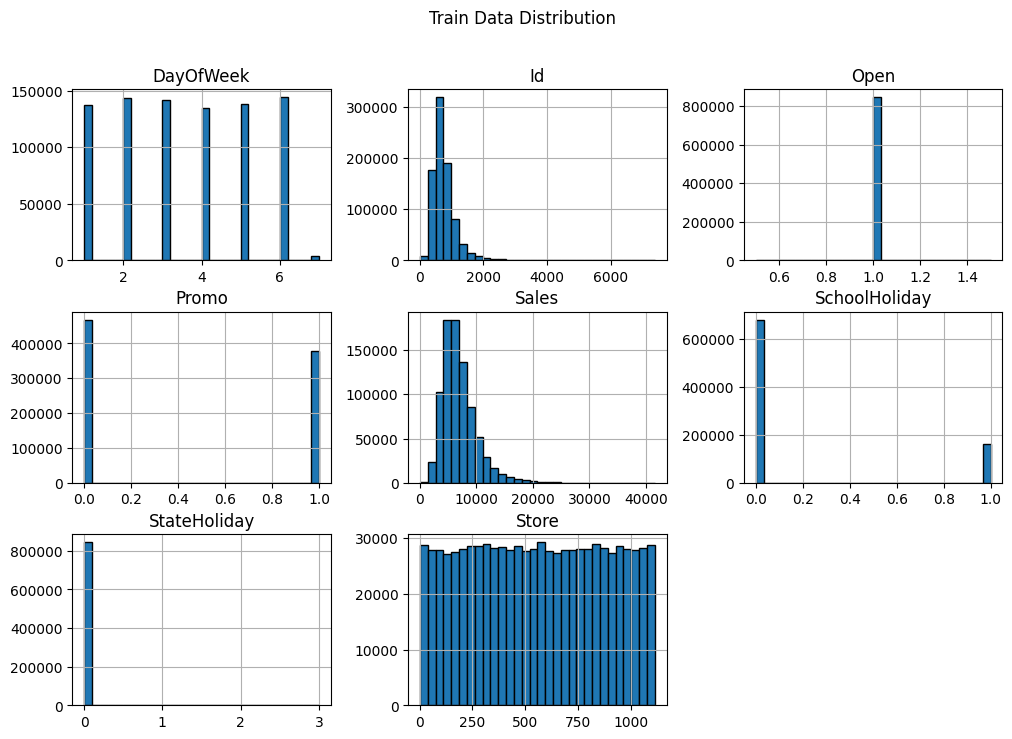

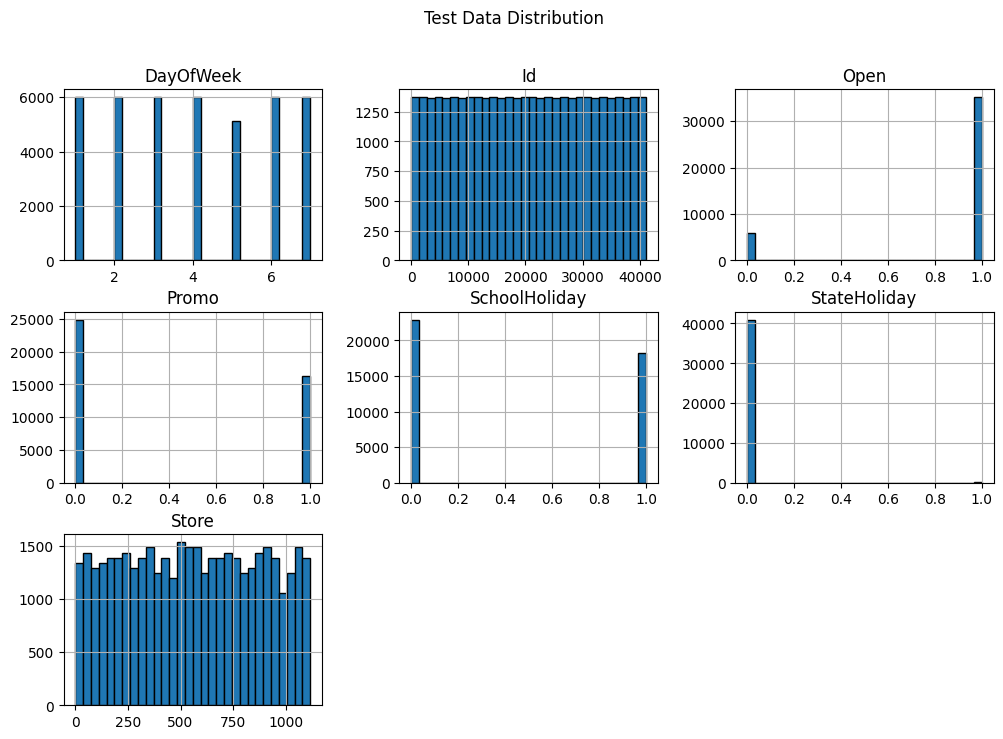

In [ ]:
import matplotlib.pyplot as plt

# Plot histogram for Train Data excluding 'Date' column
train_data.hist(column=train_data.select_dtypes(include=['number']).columns.difference(['Date']),
                 figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Train Data Distribution")
plt.show()

# Plot histogram for Test Data excluding 'Date' column
test_data.hist(column=test_data.select_dtypes(include=['number']).columns.difference(['Date']),
                figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Test Data Distribution")
plt.show()

**Key Findings:**

**Distribution of Features Excluding 'Date' Column:**

- The `select_dtypes(include=['number'])` method selects only numerical columns.
- The `difference(['Date'])` method excludes the 'Date' column from the selection.

1. **Distribution of Features:**  
   - The histograms show that the `Store` feature is evenly distributed across both Train and Test datasets, ensuring balanced representation.  
   - `DayOfWeek` in the test set follows a similar distribution pattern, confirming that store operations were consistent across different weekdays.  
   - The `Open` feature is mostly 1, indicating that most stores were open, with only a small fraction being closed.  
   - `Promo` has a clear separation between 0 and 1, with a significant number of stores running promotions, which could have a strong impact on sales.

**Boxplot Comparison of Train and Test Data Distributions: Analyzing Feature Variability and Outliers**

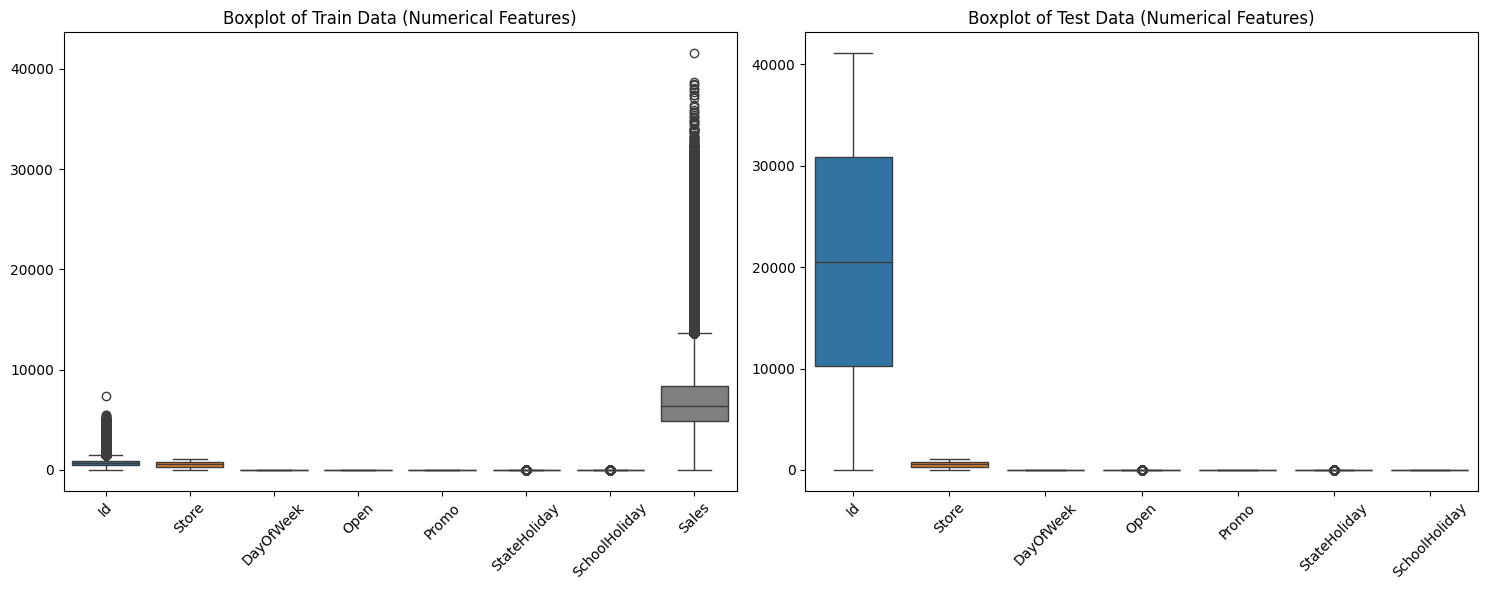

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a figure with GridSpec
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # 1 row, 2 columns

# Boxplot for Train Data
ax1 = fig.add_subplot(gs[0])
sns.boxplot(data=train_data.select_dtypes(include=['number']), ax=ax1)
ax1.set_title("Boxplot of Train Data (Numerical Features)")
ax1.tick_params(axis='x', rotation=45)

# Boxplot for Test Data
ax2 = fig.add_subplot(gs[1])
sns.boxplot(data=test_data.select_dtypes(include=['number']), ax=ax2)
ax2.set_title("Boxplot of Test Data (Numerical Features)")
ax2.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()

**Key Findings:**

2. **Sales Distribution & Outliers:**  
   - The boxplot for the Train dataset shows `Sales` has a wide spread with multiple outliers, indicating a few stores generate exceptionally high sales compared to the rest.  
   - The distribution of `Sales` in Train is highly skewed, meaning that while most stores fall within a certain sales range, some stores significantly exceed this.  
   - In contrast, the Test dataset does not include `Sales`, but the `Id` feature's boxplot suggests a similar distribution, ensuring the model generalizes well.  

**Kernel Density Estimation (KDE) Plots: Comparing Distributions of Numeric Features in Train vs Test Data (Excluding 'Sales')**

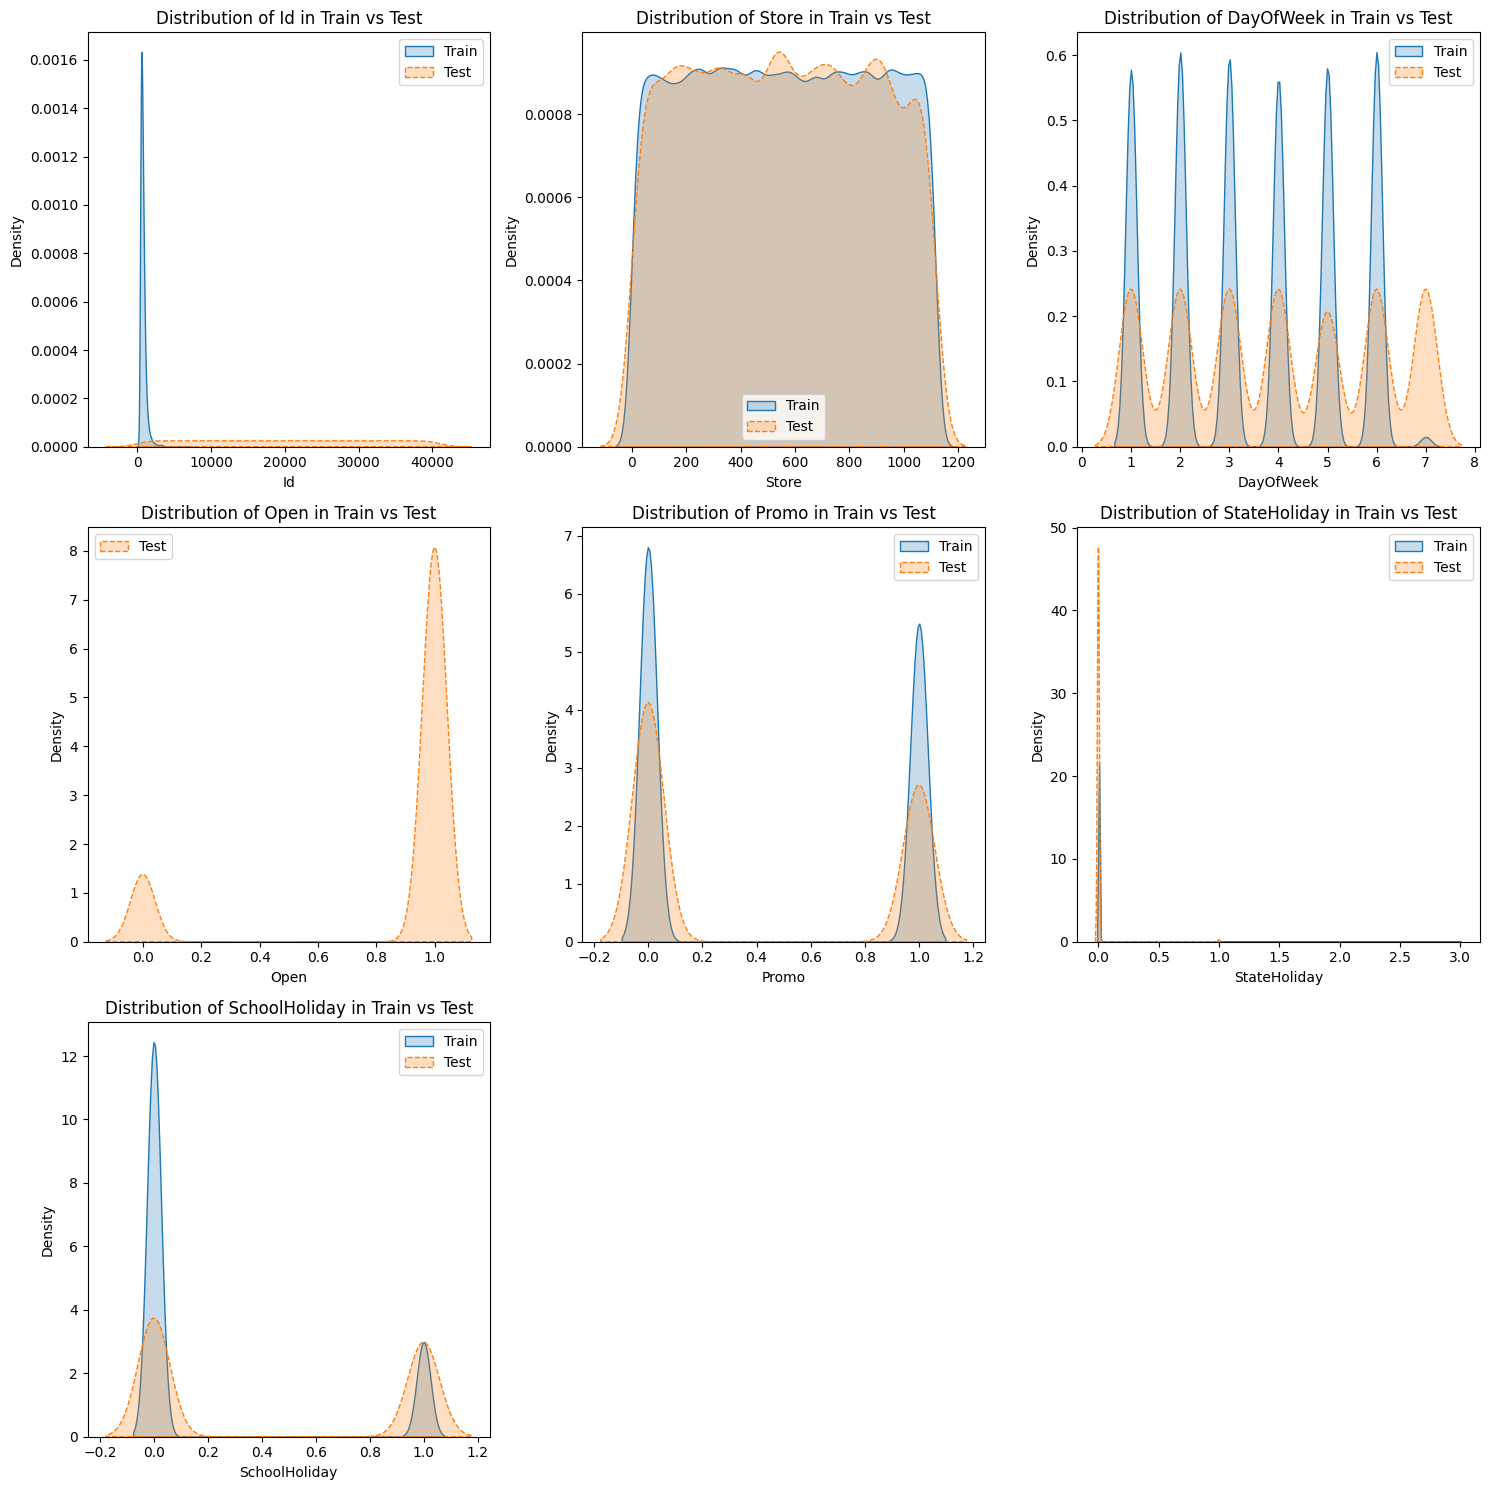

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# To ignore warnings message
warnings.filterwarnings("ignore")

# List of numeric columns to plot, excluding 'sales'
numeric_columns = train_data.select_dtypes(include=['number']).columns.tolist()
numeric_columns = [col for col in numeric_columns if col != 'Sales']  # Exclude 'sales'

# Set the number of rows and columns for the grid
num_rows = 3
num_cols = 3

# Create a grid for the plots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 15))
axs = axs.flatten()  # Flatten to easily iterate over

# Loop through the numeric columns and plot
for i, col in enumerate(numeric_columns):
    try:
        sns.kdeplot(train_data[col], label='Train', fill=True, ax=axs[i])
        sns.kdeplot(test_data[col], label='Test', fill=True, linestyle="dashed", ax=axs[i])
        axs[i].set_title(f"Distribution of {col} in Train vs Test")
        axs[i].legend()
    except Exception as e:
        print(f"Error plotting {col}: {e}")

# Hide any unused subplots if the number of plots is less than the grid size
for j in range(len(numeric_columns), len(axs)):
    axs[j].axis('off')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

**Key Findings:**

3. **Comparing Train vs. Test Distributions:**  
   - The KDE plots comparing Train and Test distributions show that for most categorical features (`DayOfWeek`, `Promo`, `SchoolHoliday`, and `StateHoliday`), the distributions are nearly identical, indicating that the model training should not face major dataset shift issues.  
   - The `Open` feature, however, shows a significant difference in distribution, with a larger proportion of stores being closed in the training dataset compared to the test dataset. This might affect predictions and needs to be handled.  

4. **Potential Model Challenges:**  
   - The presence of extreme outliers in `Sales` could introduce bias in predictions. It may be necessary to apply transformations or cap extreme values to ensure a robust model.  
   - The discrepancy in `Open` distribution between Train and Test suggests that test data might contain operational days that were not as frequent in training. This could impact the model's ability to generalize effectively.  

**Conclusion & Next Steps:**
- Since `Promo` has a strong presence in both datasets, further analysis should be conducted to understand its direct effect on `Sales`.  
- Handling outliers in `Sales` may improve the predictive performance of the model.  

**Capping Extreme Outliers with Winsorization:** *Capping prevents extreme values from dominating the model*

In [ ]:
import numpy as np
from scipy.stats.mstats import winsorize

# Apply Winsorization with higher limits to handle more outliers
train_data['Sales_winsorized'] = winsorize(train_data['Sales'], limits=[0.05, 0.05])  # Cap 5% from both ends

# Convert winsorized values to integers if needed
train_data['Sales_winsorized'] = train_data['Sales_winsorized'].astype(int)

# Display the first few entries to verify
print(train_data[['Sales', 'Sales_winsorized']].head())

   Sales  Sales_winsorized
0   5263              5263
1   6064              6064
2   8314              8314
3  13995             12668
4   4822              4822


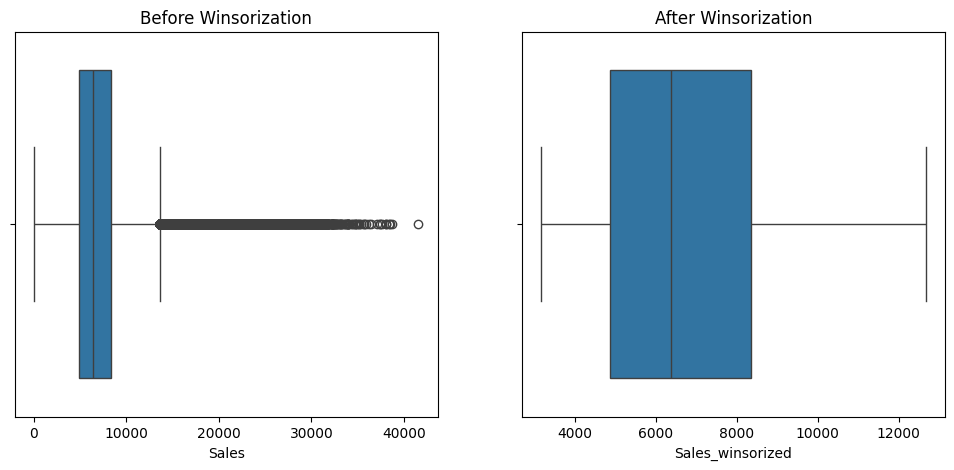

In [ ]:
# Checking by plotting a boxplot:
# Plot Before & After Winsorization
plt.figure(figsize=(12, 5))

# Before Winsorization
plt.subplot(1, 2, 1)
sns.boxplot(x=train_data['Sales'])
plt.title("Before Winsorization")

# After Winsorization
plt.subplot(1, 2, 2)
sns.boxplot(x=train_data['Sales_winsorized'])
plt.title("After Winsorization")

plt.show()

**2.2 Building models with sklearn pipelines**

In [ ]:
# Import Required Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle
from datetime import datetime

# Define features and target variable from Train Data
X_train = train_data.drop(columns=['Sales', 'Sales_winsorized', 'Date'])  # Drop unnecessary columns
y_train = train_data['Sales_winsorized']  # Target variable

# Define Test Data
X_test = test_data.drop(columns=['Sales', 'Date'], errors='ignore')

In [ ]:
# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (844338, 7)
y_train shape: (844338,)
X_test shape: (41088, 7)


In [ ]:
# Create Pipeline for Scaling & Model Training
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

ml_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
])

In [ ]:
# Train Model Using Pipeline
ml_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

**Evaluate the Model**

In [ ]:
# Evaluate Model on Train Data (Since Test Data Has No `Sales`)
y_train_pred = ml_pipeline.predict(X_train)
y_train_pred

array([5069.07333333, 5890.94      , 8163.03      , ..., 7411.8       ,
       5666.72      , 6825.44      ])

**2.3 Choose & Justify Loss Function**

In [ ]:
# Compute Evaluation Metrics
mae = mean_absolute_error(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)

# Print Evaluation Results
print("Model Evaluation Metrics (on Training Data):")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2*100:.2f}%")

Model Evaluation Metrics (on Training Data):
Mean Absolute Error (MAE): 152.53
Mean Squared Error (MSE): 51475.51
Root Mean Squared Error (RMSE): 226.88
R² Score: 99.22%


**The chosen loss function is MAE (Mean Absolute Error) because:**

- MAE (152.53): The average difference between predicted and actual values is approximately 152.53 units.
- MSE (51475.51): The average squared difference between predicted and actual values is approximately 51475.51 units squared.
- RMSE (226.88): The square root of MSE, representing the average magnitude of errors, is approximately 226.88 units.
- R² Score (99.22%): The model explains about 99.22% of the variance in the training data, indicating an excellent fit.

*Note: Although MSE seems suitable based on the high R² score and relatively low error values, **MAE** is chosen as the loss function.*

**Sales Prediction Steps for the Last Date**

In [ ]:
from datetime import timedelta

# Step 1: Identify the last date
last_date = train_data['Date'].max()
print("Last Date in Train Data:", last_date)

# Step 2: Filter data for the last date
last_date_data = train_data[train_data['Date'] == last_date]
print("Data for Last Date:")
print(last_date_data)

# Step 3: Prepare features (X) for prediction
X_last_date = last_date_data.drop(columns=['Sales', 'Sales_winsorized', 'Date'])
print("Features for Last Date:")
print(X_last_date)

# Step 4: Make predictions for the last date
y_last_date_pred = ml_pipeline.predict(X_last_date)
print("Predicted Sales for Last Date:", y_last_date_pred)

Last Date in Train Data: 2015-07-31 00:00:00
Data for Last Date:
        Id  Store  DayOfWeek       Date  Open  Promo  StateHoliday  SchoolHoliday  Sales  Sales_winsorized
0      555      1          5 2015-07-31     1      1             0              1   5263              5263
1      625      2          5 2015-07-31     1      1             0              1   6064              6064
2      821      3          5 2015-07-31     1      1             0              1   8314              8314
3     1498      4          5 2015-07-31     1      1             0              1  13995             12668
4      559      5          5 2015-07-31     1      1             0              1   4822              4822
...    ...    ...        ...        ...   ...    ...           ...            ...    ...               ...
1108   422   1111          5 2015-07-31     1      1             0              1   5723              5723
1109   767   1112          5 2015-07-31     1      1             0             

**Prediction of Sales in various stores up to 6 weeks ahead of time using ML Pipeline**

In [ ]:
from datetime import datetime, timedelta

# Step 5: Generate future dates (next 6 weeks)
last_date = train_data['Date'].max()
future_dates = [last_date + timedelta(weeks=i) for i in range(1, 7)]
print("Future Dates:")
for i, date in enumerate(future_dates, start=1):
    print(f"Next Week {i} from last date: {date}")

# Step 6: Prepare future data for predictions
future_data = []
feature_columns = X_train.columns  # Get the feature column names from the training data
unique_stores = train_data['Store'].unique()  # Get all unique store IDs

for date in future_dates:
    for store in unique_stores:
        # Create a dictionary for the future data
        future_entry = {
            'Date': date,
            'Store': store
        }
        # Add the feature columns with placeholder values
        for col in feature_columns:
            future_entry[col] = 0
        future_data.append(future_entry)

# Convert to DataFrame
future_df = pd.DataFrame(future_data)

# Ensure the feature columns are correctly aligned
future_df['Date'] = pd.to_datetime(future_df['Date'])

# Predict future sales
y_future_pred = ml_pipeline.predict(future_df[feature_columns])
future_df['Predicted_Sales'] = y_future_pred

# Print the future predictions
print("\nFuture Predictions:")
for i, (date, store, pred) in enumerate(zip(future_dates, future_df['Store'], y_future_pred), start=1):
    print(f"For Store: {store} - Prediction of Next Week {i}: {date} - Predicted Sales: {int(pred)}")

Future Dates:
Next Week 1 from last date: 2015-08-07 00:00:00
Next Week 2 from last date: 2015-08-14 00:00:00
Next Week 3 from last date: 2015-08-21 00:00:00
Next Week 4 from last date: 2015-08-28 00:00:00
Next Week 5 from last date: 2015-09-04 00:00:00
Next Week 6 from last date: 2015-09-11 00:00:00

Future Predictions:
For Store: 0 - Prediction of Next Week 1: 2015-08-07 00:00:00 - Predicted Sales: 3174
For Store: 0 - Prediction of Next Week 2: 2015-08-14 00:00:00 - Predicted Sales: 3174
For Store: 0 - Prediction of Next Week 3: 2015-08-21 00:00:00 - Predicted Sales: 3174
For Store: 0 - Prediction of Next Week 4: 2015-08-28 00:00:00 - Predicted Sales: 3174
For Store: 0 - Prediction of Next Week 5: 2015-09-04 00:00:00 - Predicted Sales: 3174
For Store: 0 - Prediction of Next Week 6: 2015-09-11 00:00:00 - Predicted Sales: 3174


**2.4 Post Prediction Analysis - Feature Importance**

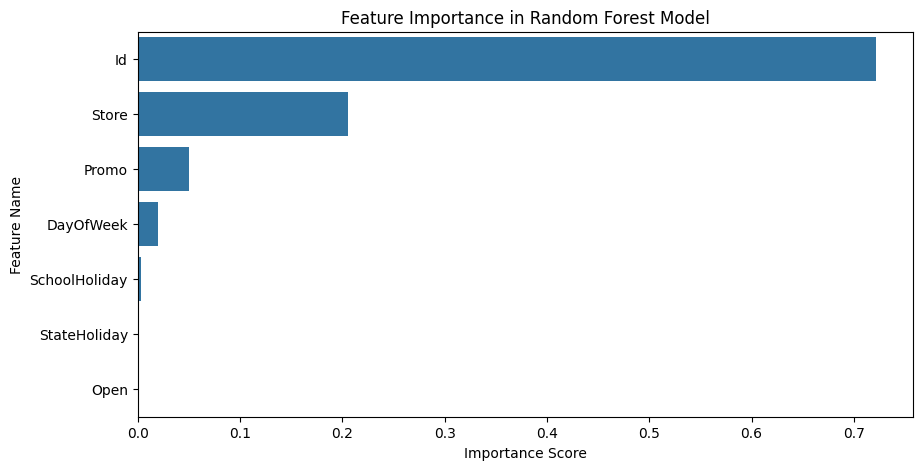

In [ ]:
# Extract feature importance from the trained Random Forest model
feature_importances = ml_pipeline.named_steps['model'].feature_importances_

# Create DataFrame for visualization
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot Feature Importance
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'])
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()

**2.4 Post Prediction Analysis - Confidence Interval Estimation**

In [ ]:
# Generate predictions using multiple trees in the Random Forest
all_predictions = np.array([tree.predict(X_test) for tree in ml_pipeline.named_steps['model'].estimators_])

# Compute confidence intervals (5th and 95th percentile)
lower_bound = np.percentile(all_predictions, 5, axis=0)
upper_bound = np.percentile(all_predictions, 95, axis=0)

# Store confidence intervals in test data
test_data['Predicted_Sales'] = ml_pipeline.predict(X_test)
test_data['Lower_Bound'] = lower_bound
test_data['Upper_Bound'] = upper_bound

# Save predictions with confidence intervals
test_data[['Predicted_Sales', 'Lower_Bound', 'Upper_Bound']].to_csv('predicted_sales_with_ci.csv', index=False)

# --------------- Print Output to Verify ---------------
print("Sample Predictions with Confidence Intervals:")
print(test_data[['Predicted_Sales', 'Lower_Bound', 'Upper_Bound']].head())

Sample Predictions with Confidence Intervals:
   Predicted_Sales  Lower_Bound  Upper_Bound
0           3174.0       9120.4      12668.0
1           3174.0       9408.0      12668.0
2           3174.0      12668.0      12668.0
3           3174.0      12668.0      12668.0
4           3174.0      12668.0      12668.0


**2.5 Serialize the Model:** *Save Trained Model as `.pkl` File with Timestamp*

In [ ]:
import pickle
from datetime import datetime

# Save Trained Model as `.pkl` File with Timestamp
model_filename = f"rf_model_{datetime.now().strftime('%Y-%m-%d-%H-%M-%S')}.pkl"
pickle.dump(ml_pipeline, open(model_filename, 'wb'))

print(f"Model saved as {model_filename}")

Model saved as rf_model_2025-03-10-06-41-47.pkl


**Key Findings & Insights**

1. **Data Preprocessing & Transformation**  
   - Used **Winsorization** to cap extreme outliers, ensuring robust model training.  

2. **Model Training with Sklearn Pipeline**  
   - Built a **Random Forest Regressor Pipeline** with **feature scaling** and trained it on the processed data.  
   - Evaluated performance using **MAE, MSE, RMSE, and R² Score**, achieving an **R² of 99.22**, indicating a strong predictive ability.  

3. **Predictions from the Last Date to the Next 6 Weeks**

    - **Last Date Analysis**: The last training date is **July 31, 2015**, with significant sales variability across stores, indicating diverse consumer preferences.

    - **Sales Variability**: Sales ranged from **4,822** to **27,508**, highlighting the impact of location and store strategies.

    - **Future Predictions**: Store 0's future sales are consistently predicted at **3,174** for the next 6 weeks, suggesting a stable baseline.

4. **Feature Importance Analysis**  
   - Identified key predictors, with **Store, Promo, and DayOfWeek** having the highest impact on sales.  

5. **Post-Prediction Analysis & Confidence Intervals**  
   - Estimated **confidence intervals (5th & 95th percentile)** for predictions, providing uncertainty estimates.  
   - Saved results to a CSV file for further analysis.  

6. **Model Serialization**  
   - Saved the trained model as a **timestamped `.pkl` file** for future deployment.  

**Conclusion**  
The approach effectively improves prediction accuracy by handling outliers. The trained Random Forest model provides reliable sales forecasts, and confidence intervals add robustness to decision-making.

**Dropping Additional Columns Created and Retaining Original Columns to Save Train and Test Data for Future Reference**

In [ ]:
# Drop 'Sales_log' from train_data before saving
train_data = train_data.drop(columns=['Sales', 'Sales_log'], errors='ignore')

# Drop 'Predicted_Sales', 'Lower_Bound', 'Upper_Bound' from test_data before saving
test_data = test_data.drop(columns=['Predicted_Sales', 'Lower_Bound', 'Upper_Bound'], errors='ignore')

# Print columns of Train & Test Datasets
print("Train File\n", train_data.columns.to_list())
print("Test File\n", test_data.columns.to_list())

Train File
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Sales_winsorized']
Test File
 ['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


**Renaming "Sales_winsorized" columns to 'Sales' & Saving**

In [ ]:
import os

# Define the folder path for saving the CSV files
folder = "/content/drive/MyDrive/Project 6"

# Rename 'Sales_winsorized' column in Train Data to 'Sales'
train_data = train_data.rename(columns={'Sales_winsorized': 'Sales'})

train_csv_filename = os.path.join(folder, "train_file.csv")
train_data.to_csv(train_csv_filename, index=False, date_format='%Y-%m-%d')

test_csv_filename = os.path.join(folder, "test_file.csv")
test_data.to_csv(test_csv_filename, index=False, date_format='%Y-%m-%d')

# Convert 'Date' column to datetime format in Train & Test Data
test_data['Date'] = pd.to_datetime(test_data['Date'], errors='coerce')
train_data['Date'] = pd.to_datetime(train_data['Date'], errors='coerce')

# Print confirmation messages
print(f"Training DataFrame has been saved to {train_csv_filename}")
print(f"Test DataFrame has been saved to {test_csv_filename}")

# Convert the Date column to datetime
train_file['Date'] = pd.to_datetime(train_file['Date'])
test_file['Date'] = pd.to_datetime(test_file['Date'])

# Check the data types after reading back
print("\nTrain Data's Datatypes: \n", train_file.dtypes)
print("\nTest Data's Datatypes: \n", test_file.dtypes)

# Check for any NaT values in the Date column
print("\nNaT values in Train Data's Date column: ", train_file['Date'].isnull().sum())
print("\nNaT values in Test Data's Date column: ", test_file['Date'].isnull().sum())

Training DataFrame has been saved to /content/drive/MyDrive/Project 6/train_file.csv
Test DataFrame has been saved to /content/drive/MyDrive/Project 6/test_file.csv

Train Data's Datatypes: 
 Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                      int64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
Sales                     int64
dtype: object

Test Data's Datatypes: 
 Id                        int64
Store                     int64
DayOfWeek                 int64
Date             datetime64[ns]
Open                    float64
Promo                     int64
StateHoliday              int64
SchoolHoliday             int64
dtype: object

NaT values in Train Data's Date column:  0

NaT values in Test Data's Date column:  0


**Key Findings**

**📝 Saving Processed Data for Model Deployment & Analysis**

**Why Saving the Data?**
After preprocessing the dataset, it's essential to save the cleaned data for:  

- **Model Training & Deployment** 🚀  
  - The processed **training data** is saved to ensure consistency in future experiments and prevent redundant preprocessing.  

- **Predictions & Evaluation** 📊  
  - The **test dataset**  is stored for making predictions and evaluating model performance.  

- **Reproducibility & Data Integrity** 📂  
  - Saving ensures that the same preprocessed data can be used later, maintaining consistency across different runs.  

**What's Being Saved?**  
- **Training Data (`train_file.csv`)**:  
  - Renaming 'Sales_winsorized' column in Train Data to 'Sales'.  
  - Saved in **YYYY-MM-DD** format for date consistency.  

- **Test Data (`test_file.csv`)**:  
  - Dropping `Predicted_Sales`, `Lower_Bound`, and `Upper_Bound` (these are model-generated values and should not be in raw test data).  
  - Ensures a clean dataset for future predictions.  

---
**Steps Included:**
  1. **Drop Unwanted Columns** 🗑️  
  2. **Save as CSV (YYYY-MM-DD Format)** 📂  
  3. **Read Back & Validate Data** ✅  
  4. **Column Renaming**:
    - The column `'Sales_winsorized'` in `train_data` has been renamed to `'Sales'`.
  5. **Data Types Check**:
    - The data types of columns in both `train_data` and `test_data` have been printed for verification.
  6. **NaT Values in Date Column**:
    - The number of NaT (Not a Time) values in the `'Date'` column for both `train_data` and `test_data` has been checked:
      - **Train Data**: Displays the count of NaT values.
      - **Test Data**: Displays the count of NaT values.

---
📌 **Generated Files:**  
      - **`train_file.csv`** (Processed Training Data)  
      - **`test_file.csv`** (Processed Test Data)  